In [26]:
# define and import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
num_epochs = 5
batch_size = 40
learning_rate = 0.001
classes = ('plane', 'car' , 'bird',
    'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')

cuda


In [27]:
# setting datasets
transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize( 
       (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010) 
    )
])
train_dataset = torchvision.datasets.CIFAR10(
    root= './data', train = True,
    download =True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(
    root= './data', train = False,
    download =True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
train_loader = torch.utils.data.DataLoader(train_dataset
    , batch_size = batch_size
    , shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset
    , batch_size = batch_size
    , shuffle = True)
n_total_step = len(train_loader)
# check total steps
print(n_total_step)

1250


In [29]:
# load model 
model = models.vgg16(pretrained = True)
input_lastLayer = model.classifier[6].in_features
model.classifier[6] = nn.Linear(input_lastLayer,10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9,weight_decay=5e-4)

/home/swuser08/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/swuser08/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/swuser08/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:47<00:00, 11.6MB/s] 


In [30]:
for epoch in range(num_epochs): # do training
    for i, (imgs , labels) in enumerate(train_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        labels_hat = model(imgs)
        n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
        loss_value = criterion(labels_hat, labels)
        loss_value.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (i+1) % 250 == 0:
           print(f'epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: loss = {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}%')
    print()

epoch 1/5, step: 250/1250: loss = 0.39815, acc = 85.00%
epoch 1/5, step: 500/1250: loss = 0.28888, acc = 87.50%
epoch 1/5, step: 750/1250: loss = 0.54812, acc = 80.00%
epoch 1/5, step: 1000/1250: loss = 0.25585, acc = 92.50%
epoch 1/5, step: 1250/1250: loss = 0.23110, acc = 90.00%

epoch 2/5, step: 250/1250: loss = 0.16319, acc = 92.50%
epoch 2/5, step: 500/1250: loss = 0.18148, acc = 95.00%
epoch 2/5, step: 750/1250: loss = 0.18563, acc = 95.00%
epoch 2/5, step: 1000/1250: loss = 0.44389, acc = 85.00%
epoch 2/5, step: 1250/1250: loss = 0.29205, acc = 90.00%

epoch 3/5, step: 250/1250: loss = 0.29850, acc = 87.50%
epoch 3/5, step: 500/1250: loss = 0.09712, acc = 97.50%
epoch 3/5, step: 750/1250: loss = 0.10674, acc = 92.50%
epoch 3/5, step: 1000/1250: loss = 0.17575, acc = 95.00%
epoch 3/5, step: 1250/1250: loss = 0.11712, acc = 97.50%

epoch 4/5, step: 250/1250: loss = 0.12208, acc = 95.00%
epoch 4/5, step: 500/1250: loss = 0.03612, acc = 100.00%
epoch 4/5, step: 750/1250: loss = 0.13

In [31]:
with torch.no_grad(): # check default accuracy
    number_corrects = 0
    number_samples = 0
    for i, (test_images_set , test_labels_set) in enumerate(test_loader):
        test_images_set = test_images_set.to(device)
        test_labels_set = test_labels_set.to(device)
    
        y_predicted = model(test_images_set)
        labels_predicted = y_predicted.argmax(axis = 1)
        number_corrects += (labels_predicted==test_labels_set).sum().item()
        number_samples += test_labels_set.size(0)
    print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

Overall accuracy 92.25999999999999%


In [35]:
print(list(enumerate(model.modules()))[0][1]) # check model's components


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [40]:
# copy FC layer 2 as v
sh = (list(enumerate(model.modules()))[0][1].classifier[3]).weight.shape
v = []
with torch.no_grad():
    
    for i in range(sh[0]):
        for j in range(sh[1]):
            v.append([i, j, (list(enumerate(model.modules()))[0][1].classifier[3]).weight[i, j].item()])
        if i % 100 == 0:
            print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000


In [41]:

v = sorted(v, key = lambda x : x[2])  #sorting
v.reverse()


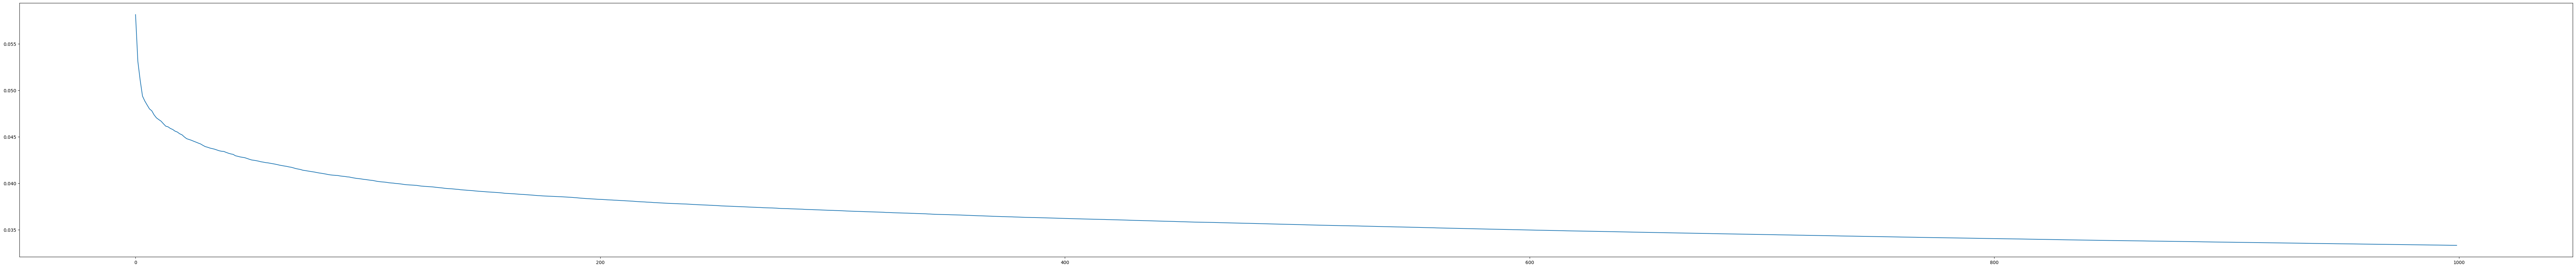

In [42]:
from matplotlib import pyplot as plt # check sorted weight's graph
plt.figure(figsize=(100,10))
plt.plot(list(zip(*v[:10000:10]))[2])

In [43]:
# import again 
import random 
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random 

In [44]:
#Test default ACC
test_loss = 0
correct = 0
test_losses=[]
test_losses=[]
test_accuracy=[]
for data, target in test_loader:
    if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.cross_entropy(output, target, size_average=False).item()
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
        
    
test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
acc=100. * float(correct.to(torch.device('cpu')).numpy())
print('\nTest result: Average loss: {:.4f}, Accuracy: {:.4f}%\n'.format(
    test_loss, acc / len(test_loader.dataset)))
    
test_accuracy.append(acc / len(test_loader.dataset))

/tmp/ipykernel_1839194/1935169811.py:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/home/swuser08/.local/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test result: Average loss: 0.2456, Accuracy: 92.5700%



In [45]:
import random 
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random 
correct_hist = []
sh = (list(enumerate(model.modules()))[0][1].classifier[3]).weight.shape
layer = (list(enumerate(model.modules()))[0][1].classifier[3]).weight

#num=int(4098*4098*(1/20))


num = 10
temp = 0
r = 0
value =0
with open("/home/swuser08/VGG16_CIFAR10.txt", 'w') as f:
    for a in range(100):# total run NUM
        with torch.no_grad():
            test_loss = 0
            correct = 0
            test_losses=[]
            test_accuracy=[]
            r = random.randrange(0,num)
            temp = layer[v[r][0]][v[r][1]].clone()#copy the default value
            layer[v[r][0]][v[r][1]] = 10**random.randrange(3, 10)#*random.randrange(10,20) insert random weight value in random neruon which located in specific layer(fc2)    
            print("Fault injected: {:4d} {:4d} {:.5f}=>{:.5f}".format(v[r][0], v[r][1], v[r][2], layer[v[r][0]][v[r][1]].item()))
            print("Fault injected: {:4d} {:4d} {:.5f}=>{:.5f}".format(v[r][0], v[r][1], v[r][2], layer[v[r][0]][v[r][1]].item()), file=f)
            
            for data, target in test_loader:
                if torch.cuda.is_available():
                    data, target = data.cuda(), target.cuda()
                    data, target = Variable(data, volatile=True), Variable(target)
                    output = model(data)
                    test_loss += F.cross_entropy(output, target, size_average=False).item()
                    pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
                    correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
                
            test_loss /= len(test_loader.dataset)
            test_losses.append(test_loss)
            acc=100. * float(correct.to(torch.device('cpu')).numpy())
            print('\nTest result: Average loss: {:.4f}, Accuracy: {:.4f}%\n'.format(
                test_loss, acc / len(test_loader.dataset)))
            print('Fault Injected Test result: Average loss: {:.4f}, Accuracy: {:.4f}%'.format(
                test_loss, acc / len(test_loader.dataset)), file=f)
                
        for i in range(num):# Top n Neurons
            with torch.no_grad():
                # print(layer[v[i][0]][v[i][1]])
                test_loss = 0
                correct = 0
                test_losses=[]
                test_accuracy=[]
                target_temp = layer[v[i][0]][v[i][1]].clone() # save fault value at target_temp 
                print(layer[v[i][0]][v[i][1]])
                layer[v[i][0]][v[i][1]] = 0            # change faulted value as 0
                for data, target in test_loader:
                    data, target = Variable(data, volatile=True), Variable(target)
                    if torch.cuda.is_available():
                        data, target = data.cuda(), target.cuda()
                        data, target = Variable(data, volatile=True), Variable(target)
                        output = model(data)
                        test_loss += F.cross_entropy(output, target, size_average=False).item()
                        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
                        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
                        
                    
                test_loss /= len(test_loader.dataset)
                test_losses.append(test_loss)
                acc=100. * float(correct.to(torch.device('cpu')).numpy())
                print('{:4f} {:4f} Test result: Average loss: {:.4f}, Accuracy: {:.4f}%'.format(
                    a, i, test_loss, acc / len(test_loader.dataset)), file=f)
                print('{:4f} {:4f} Test result: Average loss: {:.4f}, Accuracy: {:.4f}%'.format(
                    a, i, test_loss, acc / len(test_loader.dataset)))

                test_accuracy.append(acc  / len(test_loader.dataset))
                correct_hist.append((i, j, correct, value))  # the highest value and weight changed to 0 가장 높은 확률과, 0으로 바뀐 weight까지           
                    
                layer[v[i][0]][v[i][1]] = target_temp  # insert faulted value a gain 
                if len(correct_hist) % 10 == 0:# check progress
                        print(correct_hist)
        with torch.no_grad():
            layer[v[r][0]][v[r][1]]=temp                #insert DEFAULT value a gain
        correct_hist = sorted(correct_hist, key = lambda x : abs(x[2]))  #sorting
        node_high = correct_hist[-1] # take index's max -> location, highest correct's time 
        node_low = correct_hist[0]
        print('{} when high: {}'.format(a, node_high))
        print('{} when high: {}'.format(a, node_high),file=f)

        print('{} when low: {}'.format(a, node_low))
        print('{} when low: {}'.format(a, node_low),file=f)
        print('{} accuracy of the high network on the test images: {}'.format(a, node_high[2]/len(test_loader.dataset)*100))
        print('{} accuracy of the high network on the test images: {}'.format(a, node_high[2]/len(test_loader.dataset)*100),file=f)
        print('{} accuracy of the low network on the test images'.format(a, node_low[2]/len(test_loader.dataset)*100))
        print('{} accuracy of the low network on the test images'.format(a, node_low[2]/len(test_loader.dataset)*100),file=f)
        correct_hist = []

Fault injected: 1677  553 0.05814=>10000000.00000


/tmp/ipykernel_1839194/3450004973.py:38: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test result: Average loss: 119714.8299, Accuracy: 83.5100%

tensor(10000000., device='cuda:0', requires_grad=True)


/tmp/ipykernel_1839194/3450004973.py:64: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/tmp/ipykernel_1839194/3450004973.py:67: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)


0.000000 0.000000 Test result: Average loss: 0.2471, Accuracy: 92.4900%
tensor(0.0566, device='cuda:0', requires_grad=True)
0.000000 1.000000 Test result: Average loss: 126714.1917, Accuracy: 82.8400%
tensor(0.0559, device='cuda:0', requires_grad=True)
0.000000 2.000000 Test result: Average loss: 137046.5093, Accuracy: 82.4600%
tensor(0.0555, device='cuda:0', requires_grad=True)
0.000000 3.000000 Test result: Average loss: 134355.3010, Accuracy: 83.4600%
tensor(0.0553, device='cuda:0', requires_grad=True)
0.000000 4.000000 Test result: Average loss: 135184.1673, Accuracy: 83.1300%
tensor(0.0544, device='cuda:0', requires_grad=True)
0.000000 5.000000 Test result: Average loss: 133771.0119, Accuracy: 83.3300%
tensor(0.0544, device='cuda:0', requires_grad=True)
0.000000 6.000000 Test result: Average loss: 128069.2607, Accuracy: 83.1200%
tensor(0.0532, device='cuda:0', requires_grad=True)
0.000000 7.000000 Test result: Average loss: 131354.5328, Accuracy: 83.0300%
tensor(0.0532, device='cu